## Lysa check


In [25]:
import pandas as pd

# Paths to your CSV files
transaction_history_path = '../data/Transaction history.csv'

# Read the CSV file into a DataFrame with specified encoding without specifying column names
transaction_history_df = pd.read_csv(transaction_history_path, encoding='ISO-8859-1')

# Display the first few rows to inspect the structure
print(transaction_history_df.head())



     Amount                      Counterpart/Fund  \
0  10000,00                              Autogiro   
1   5623,19            Lysa Global Equity Broad C   
2    799,20  Lysa Global Small Cap Equity Broad B   
3   1800,00            Lysa Sweden Equity Broad B   
4    777,59  Lysa Emerging Markets Equity Broad B   

                          Date   Price     Type   Volume  
0  2025-01-13T10:45:54.384097Z     NaN  Deposit      NaN  
1  2025-01-14T10:35:23.423416Z  259,21      Buy  21,6936  
2  2025-01-14T10:35:51.238053Z   99,66      Buy   8,0193  
3  2025-01-14T10:36:26.434902Z  110,77      Buy  16,2499  
4  2025-01-14T10:37:04.544218Z   98,54      Buy   7,8912  


In [28]:
print(transaction_history_df)

      Amount                      Counterpart/Fund  \
0   10000,00                              Autogiro   
1    5623,19            Lysa Global Equity Broad C   
2     799,20  Lysa Global Small Cap Equity Broad B   
3    1800,00            Lysa Sweden Equity Broad B   
4     777,59  Lysa Emerging Markets Equity Broad B   
5    1000,00                         Lysa Räntor C   
6   50000,00                              Autogiro   
7   28228,90            Lysa Global Equity Broad C   
8    3994,90  Lysa Global Small Cap Equity Broad B   
9    8964,51            Lysa Sweden Equity Broad B   
10   3806,59  Lysa Emerging Markets Equity Broad B   
11   5005,06                         Lysa Räntor C   

                           Date   Price     Type    Volume  
0   2025-01-13T10:45:54.384097Z     NaN  Deposit       NaN  
1   2025-01-14T10:35:23.423416Z  259,21      Buy   21,6936  
2   2025-01-14T10:35:51.238053Z   99,66      Buy    8,0193  
3   2025-01-14T10:36:26.434902Z  110,77      Buy   16

In [16]:
import pandas as pd 
# Paths to your CSV files 
account_performance_path = '../data/Account performance.csv' 
transaction_history_path = '../data/Transaction history.csv'  




Account Performance Data - Summary Statistics:
       Accumulated growth  Account worth  Performance index
count            7.000000        7.00000       7.000000e+00
mean            23.205714    14308.92000       1.002321e+06
std             56.859849    20745.05012       5.685985e+03
min            -41.240000        0.00000       9.958760e+05
25%              0.000000     4979.38000       1.000000e+06
50%              0.000000    10000.00000       1.000000e+06
75%             41.405000    10041.40500       1.004140e+06
max            120.870000    60120.87000       1.012087e+06

Transaction History Data - Summary Statistics:
             Amount       Price
count     10.000000   10.000000
mean    5999.994000  136.068000
std     8231.629827   66.041034
min      777.590000   98.540000
25%     1200.000000  100.492500
50%     3900.745000  106.055000
75%     5468.657500  114.662500
max    28228.900000  262.680000


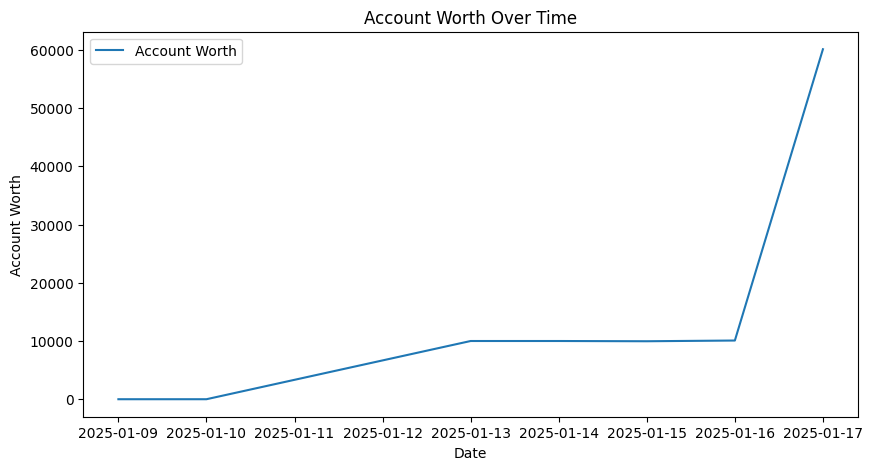

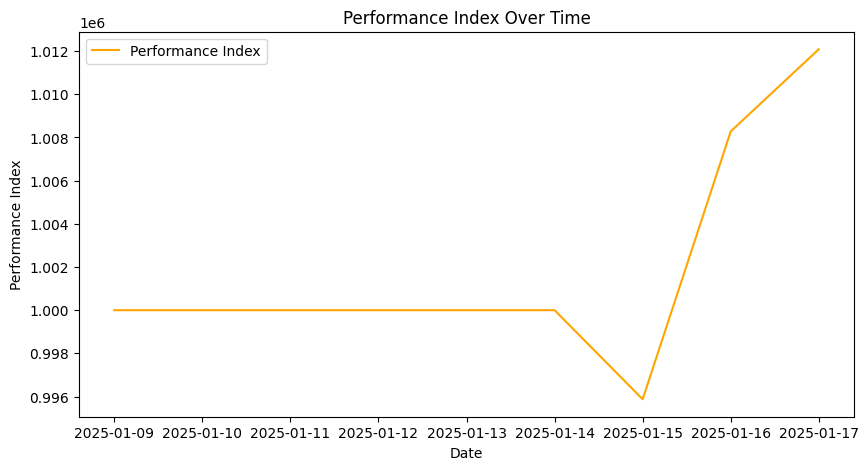

Transaction Type Distribution:
Type
Buy    10
Name: count, dtype: int64


<Figure size 1000x500 with 0 Axes>

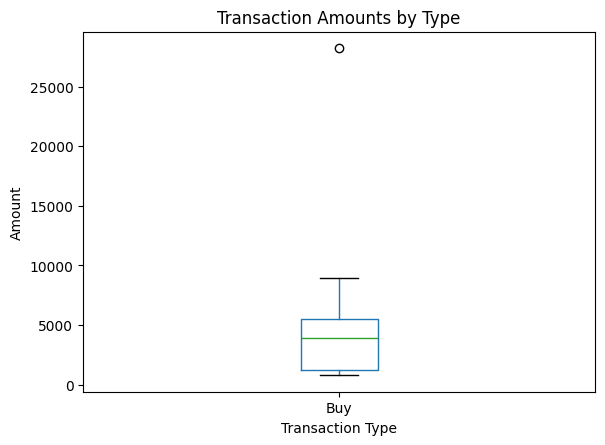

Account Performance Data - Correlation Matrix:
                    Accumulated growth      Date  Account worth  \
Accumulated growth            1.000000  0.568017       0.758295   
Date                          0.568017  1.000000       0.692018   
Account worth                 0.758295  0.692018       1.000000   
Performance index             1.000000  0.568017       0.758295   

                    Performance index  
Accumulated growth           1.000000  
Date                         0.568017  
Account worth                0.758295  
Performance index            1.000000  

Transaction History Data - Correlation Matrix:


ValueError: could not convert string to float: 'Lysa Global Equity Broad C'

In [21]:
# Define column names
column_names = ['Amount', 'Counterpart/Fund', 'Date', 'Price', 'Type', 'Volume']

# Read the CSV files into DataFrames with specified encoding and column names
account_performance_df = pd.read_csv(account_performance_path, encoding='ISO-8859-1')
transaction_history_df = pd.read_csv(transaction_history_path, encoding='ISO-8859-1', names=column_names,skiprows=1)

# Replace commas with dots in the 'Amount' and 'Price' columns
transaction_history_df['Amount'] = transaction_history_df['Amount'].str.replace(',', '.')
transaction_history_df['Price'] = transaction_history_df['Price'].str.replace(',', '.')

# Convert 'Amount' and 'Price' columns to numeric, setting invalid parsing as NaN
transaction_history_df['Amount'] = pd.to_numeric(transaction_history_df['Amount'], errors='coerce')
transaction_history_df['Price'] = pd.to_numeric(transaction_history_df['Price'], errors='coerce')

# Filter out rows where 'Amount' or 'Price' is NaN
transaction_history_df_cleaned = transaction_history_df.dropna(subset=['Amount'])

# Summary statistics for Account Performance Data
print("Account Performance Data - Summary Statistics:")
print(account_performance_df.describe())

# Summary statistics for Transaction History Data
print("\nTransaction History Data - Summary Statistics:")
print(transaction_history_df_cleaned.describe())

# Convert Date columns to datetime
account_performance_df['Date'] = pd.to_datetime(account_performance_df['Date'])
transaction_history_df['Date'] = pd.to_datetime(transaction_history_df['Date'])

# Plot Account Worth over time
plt.figure(figsize=(10, 5))
plt.plot(account_performance_df['Date'], account_performance_df['Account worth'], label='Account Worth')
plt.xlabel('Date')
plt.ylabel('Account Worth')
plt.title('Account Worth Over Time')
plt.legend()
plt.show()

# Plot Performance Index over time
plt.figure(figsize=(10, 5))
plt.plot(account_performance_df['Date'], account_performance_df['Performance index'], label='Performance Index', color='orange')
plt.xlabel('Date')
plt.ylabel('Performance Index')
plt.title('Performance Index Over Time')
plt.legend()
plt.show()

# Distribution of Transaction Types
transaction_type_counts = transaction_history_df_cleaned['Type'].value_counts()
print("Transaction Type Distribution:")
print(transaction_type_counts)

# Boxplot of Transaction Amounts by Type
plt.figure(figsize=(10, 5))
transaction_history_df_cleaned.boxplot(column='Amount', by='Type', grid=False)
plt.title('Transaction Amounts by Type')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.show()

# Correlation matrix for Account Performance Data
print("Account Performance Data - Correlation Matrix:")
print(account_performance_df.corr())

# Correlation matrix for Transaction History Data
print("\nTransaction History Data - Correlation Matrix:")
print(transaction_history_df_cleaned.corr())


In [23]:
print(transaction_history_df_cleaned.corr())

ValueError: could not convert string to float: 'Lysa Global Equity Broad C'

In [18]:
print(transaction_history_df)

      Amount                      Counterpart/Fund  \
0        NaN                      Counterpart/Fund   
1    5623.19            Lysa Global Equity Broad C   
2     799.20  Lysa Global Small Cap Equity Broad B   
3    1800.00            Lysa Sweden Equity Broad B   
4     777.59  Lysa Emerging Markets Equity Broad B   
5    1000.00                         Lysa Räntor C   
6   28228.90            Lysa Global Equity Broad C   
7    3994.90  Lysa Global Small Cap Equity Broad B   
8    8964.51            Lysa Sweden Equity Broad B   
9    3806.59  Lysa Emerging Markets Equity Broad B   
10   5005.06                         Lysa Räntor C   

                           Date   Price  Type    Volume  
0                          Date     NaN  Type    Volume  
1   2025-01-14T10:35:23.423416Z  259.21   Buy   21,6936  
2   2025-01-14T10:35:51.238053Z   99.66   Buy    8,0193  
3   2025-01-14T10:36:26.434902Z  110.77   Buy   16,2499  
4   2025-01-14T10:37:04.544218Z   98.54   Buy    7,8912  
5  

In [19]:
# Summary statistics for Account Performance Data
print("Account Performance Data - Summary Statistics:")
print(account_performance_df.describe())

# Summary statistics for Transaction History Data
print("\nTransaction History Data - Summary Statistics:")
print(transaction_history_df.describe())


Account Performance Data - Summary Statistics:
       Accumulated growth                           Date  Account worth  \
count            7.000000                              7        7.00000   
mean            23.205714  2025-01-13 10:17:08.571428608    14308.92000   
min            -41.240000            2025-01-09 00:00:00        0.00000   
25%              0.000000            2025-01-11 12:00:00     4979.38000   
50%              0.000000            2025-01-14 00:00:00    10000.00000   
75%             41.405000            2025-01-15 12:00:00    10041.40500   
max            120.870000            2025-01-17 00:00:00    60120.87000   
std             56.859849                            NaN    20745.05012   

       Performance index  
count       7.000000e+00  
mean        1.002321e+06  
min         9.958760e+05  
25%         1.000000e+06  
50%         1.000000e+06  
75%         1.004140e+06  
max         1.012087e+06  
std         5.685985e+03  

Transaction History Data - Summar

In [20]:
import matplotlib.pyplot as plt

# Convert Date columns to datetime
account_performance_df['Date'] = pd.to_datetime(account_performance_df['Date'])
transaction_history_df['Date'] = pd.to_datetime(transaction_history_df['Date'])

# Plot Account Worth over time
plt.figure(figsize=(10, 5))
plt.plot(account_performance_df['Date'], account_performance_df['Account worth'], label='Account Worth')
plt.xlabel('Date')
plt.ylabel('Account Worth')
plt.title('Account Worth Over Time')
plt.legend()
plt.show()

# Plot Performance Index over time
plt.figure(figsize=(10, 5))
plt.plot(account_performance_df['Date'], account_performance_df['Performance index'], label='Performance Index', color='orange')
plt.xlabel('Date')
plt.ylabel('Performance Index')
plt.title('Performance Index Over Time')
plt.legend()
plt.show()


/var/folders/fd/md6r13sj0wsbg_6_xl160d300000gn/T/ipykernel_32518/2476195534.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  transaction_history_df['Date'] = pd.to_datetime(transaction_history_df['Date'])


DateParseError: Unknown datetime string format, unable to parse: Date, at position 0

Transaction Type Distribution:
Type
Buy        10
Deposit     2
Name: count, dtype: int64


<Figure size 1000x500 with 0 Axes>

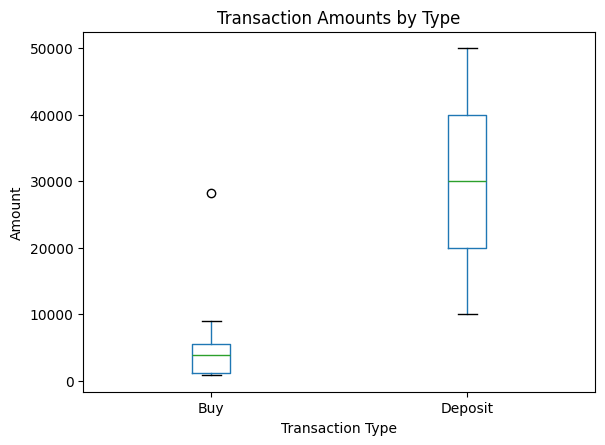

In [6]:
# Distribution of Transaction Types
transaction_type_counts = transaction_history_df['Type'].value_counts()
print("Transaction Type Distribution:")
print(transaction_type_counts)

# Boxplot of Transaction Amounts by Type
plt.figure(figsize=(10, 5))
transaction_history_df.boxplot(column='Amount', by='Type', grid=False)
plt.title('Transaction Amounts by Type')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.show()


In [7]:
# Correlation matrix for Account Performance Data
print("Account Performance Data - Correlation Matrix:")
print(account_performance_df.corr())

# Correlation matrix for Transaction History Data
print("\nTransaction History Data - Correlation Matrix:")
print(transaction_history_df.corr())


Account Performance Data - Correlation Matrix:
                    Accumulated growth      Date  Account worth  \
Accumulated growth            1.000000  0.568017       0.758295   
Date                          0.568017  1.000000       0.692018   
Account worth                 0.758295  0.692018       1.000000   
Performance index             1.000000  0.568017       0.758295   

                    Performance index  
Accumulated growth           1.000000  
Date                         0.568017  
Account worth                0.758295  
Performance index            1.000000  

Transaction History Data - Correlation Matrix:


ValueError: could not convert string to float: 'Autogiro'

Account Performance Data - Summary Statistics:
       Accumulated growth  Account worth  Performance index
count            7.000000        7.00000       7.000000e+00
mean            23.205714    14308.92000       1.002321e+06
std             56.859849    20745.05012       5.685985e+03
min            -41.240000        0.00000       9.958760e+05
25%              0.000000     4979.38000       1.000000e+06
50%              0.000000    10000.00000       1.000000e+06
75%             41.405000    10041.40500       1.004140e+06
max            120.870000    60120.87000       1.012087e+06

Transaction History Data - Summary Statistics:
             Amount
count     12.000000
mean    9999.995000
std    14677.868456
min      777.590000
25%     1600.000000
50%     4499.980000
75%     9223.382500
max    50000.000000


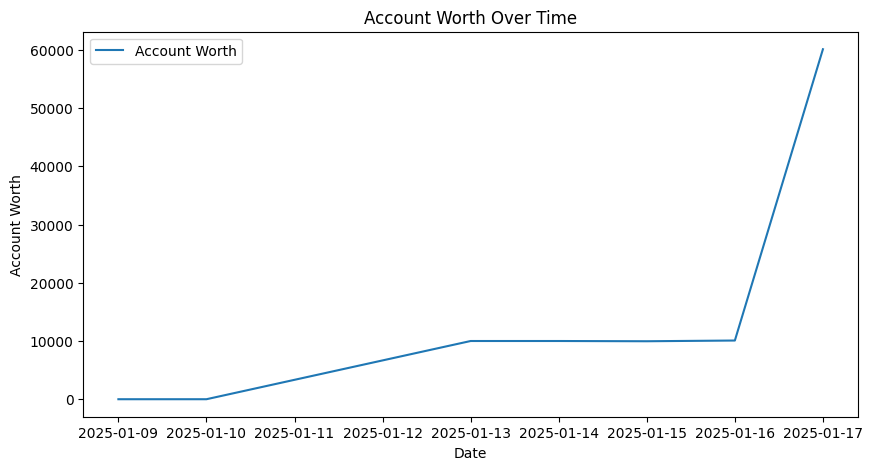

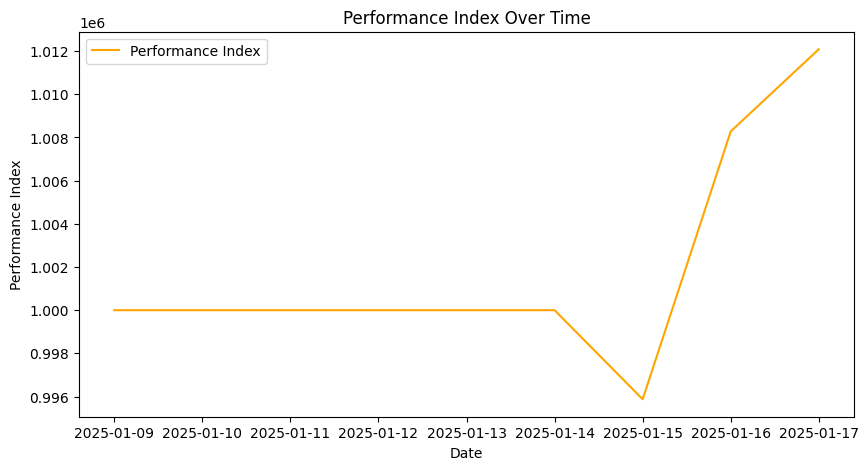

Transaction Type Distribution:
Type
Buy        10
Deposit     2
Name: count, dtype: int64


<Figure size 1000x500 with 0 Axes>

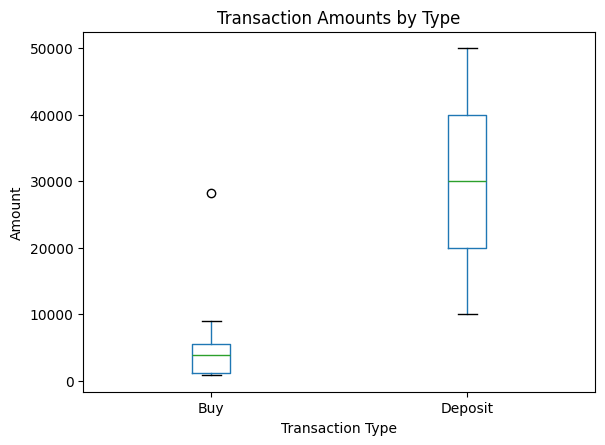

Account Performance Data - Correlation Matrix:
                    Accumulated growth      Date  Account worth  \
Accumulated growth            1.000000  0.568017       0.758295   
Date                          0.568017  1.000000       0.692018   
Account worth                 0.758295  0.692018       1.000000   
Performance index             1.000000  0.568017       0.758295   

                    Performance index  
Accumulated growth           1.000000  
Date                         0.568017  
Account worth                0.758295  
Performance index            1.000000  

Transaction History Data - Correlation Matrix:


ValueError: could not convert string to float: 'Autogiro'

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files into DataFrames with specified encoding
account_performance_df = pd.read_csv(account_performance_path, encoding='ISO-8859-1')
transaction_history_df = pd.read_csv(transaction_history_path, encoding='ISO-8859-1')

# Replace commas with dots in the 'Amount' column
transaction_history_df['Amount'] = transaction_history_df['Amount'].str.replace(',', '.')

# Convert 'Amount' column to numeric, setting invalid parsing as NaN
transaction_history_df['Amount'] = pd.to_numeric(transaction_history_df['Amount'], errors='coerce')

# Summary statistics for Account Performance Data
print("Account Performance Data - Summary Statistics:")
print(account_performance_df.describe())

# Summary statistics for Transaction History Data
print("\nTransaction History Data - Summary Statistics:")
print(transaction_history_df.describe())

# Convert Date columns to datetime
account_performance_df['Date'] = pd.to_datetime(account_performance_df['Date'])
transaction_history_df['Date'] = pd.to_datetime(transaction_history_df['Date'])

# Plot Account Worth over time
plt.figure(figsize=(10, 5))
plt.plot(account_performance_df['Date'], account_performance_df['Account worth'], label='Account Worth')
plt.xlabel('Date')
plt.ylabel('Account Worth')
plt.title('Account Worth Over Time')
plt.legend()
plt.show()

# Plot Performance Index over time
plt.figure(figsize=(10, 5))
plt.plot(account_performance_df['Date'], account_performance_df['Performance index'], label='Performance Index', color='orange')
plt.xlabel('Date')
plt.ylabel('Performance Index')
plt.title('Performance Index Over Time')
plt.legend()
plt.show()

# Distribution of Transaction Types
transaction_type_counts = transaction_history_df['Type'].value_counts()
print("Transaction Type Distribution:")
print(transaction_type_counts)

# Boxplot of Transaction Amounts by Type
plt.figure(figsize=(10, 5))
transaction_history_df.boxplot(column='Amount', by='Type', grid=False)
plt.title('Transaction Amounts by Type')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.show()

# Correlation matrix for Account Performance Data
print("Account Performance Data - Correlation Matrix:")
print(account_performance_df.corr())

# Correlation matrix for Transaction History Data
print("\nTransaction History Data - Correlation Matrix:")
print(transaction_history_df.corr())


Account Performance Data - Summary Statistics:
       Accumulated growth  Account worth  Performance index
count            7.000000        7.00000       7.000000e+00
mean            23.205714    14308.92000       1.002321e+06
std             56.859849    20745.05012       5.685985e+03
min            -41.240000        0.00000       9.958760e+05
25%              0.000000     4979.38000       1.000000e+06
50%              0.000000    10000.00000       1.000000e+06
75%             41.405000    10041.40500       1.004140e+06
max            120.870000    60120.87000       1.012087e+06

Transaction History Data - Summary Statistics:
             Amount
count     12.000000
mean    9999.995000
std    14677.868456
min      777.590000
25%     1600.000000
50%     4499.980000
75%     9223.382500
max    50000.000000


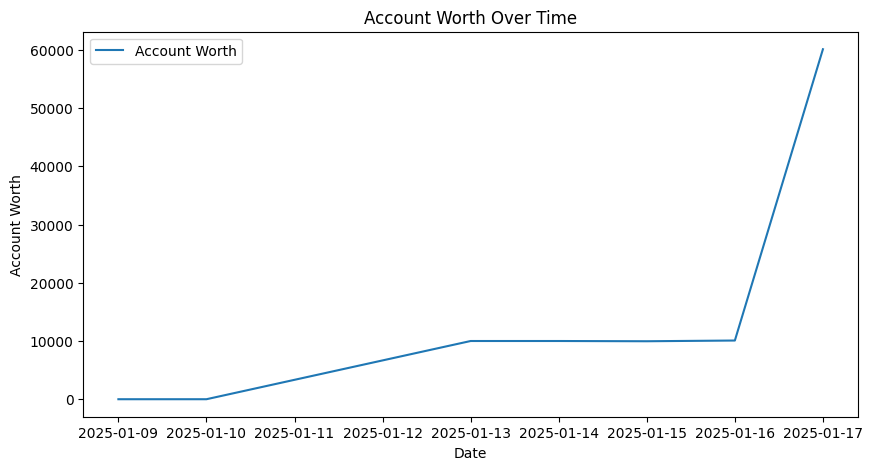

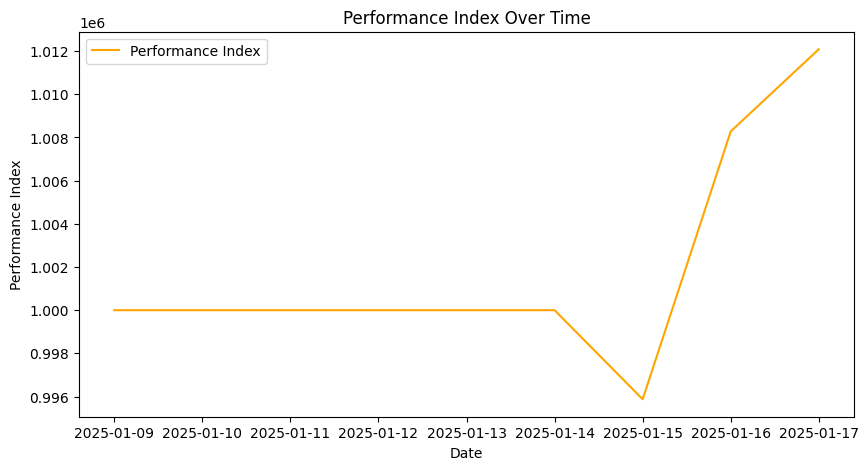

Transaction Type Distribution:
Type
Buy        10
Deposit     2
Name: count, dtype: int64


<Figure size 1000x500 with 0 Axes>

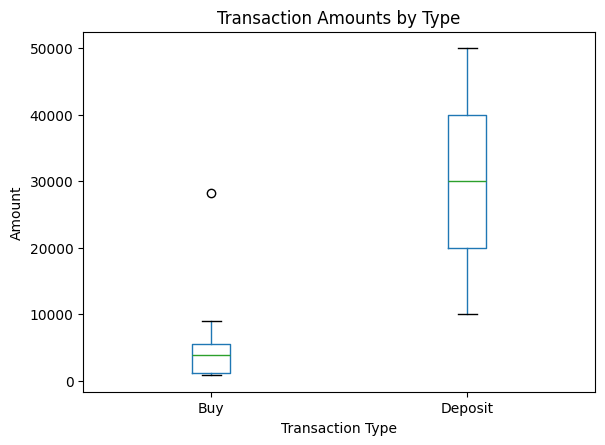

Account Performance Data - Correlation Matrix:
                    Accumulated growth      Date  Account worth  \
Accumulated growth            1.000000  0.568017       0.758295   
Date                          0.568017  1.000000       0.692018   
Account worth                 0.758295  0.692018       1.000000   
Performance index             1.000000  0.568017       0.758295   

                    Performance index  
Accumulated growth           1.000000  
Date                         0.568017  
Account worth                0.758295  
Performance index            1.000000  

Transaction History Data - Correlation Matrix:


ValueError: could not convert string to float: 'Autogiro'

In [9]:

# Read the CSV files into DataFrames with specified encoding
account_performance_df = pd.read_csv(account_performance_path, encoding='ISO-8859-1')
transaction_history_df = pd.read_csv(transaction_history_path, encoding='ISO-8859-1')

# Replace commas with dots in the 'Amount' column
transaction_history_df['Amount'] = transaction_history_df['Amount'].str.replace(',', '.')

# Convert 'Amount' column to numeric, setting invalid parsing as NaN
transaction_history_df['Amount'] = pd.to_numeric(transaction_history_df['Amount'], errors='coerce')

# Filter out rows where 'Amount' is NaN
transaction_history_df_cleaned = transaction_history_df.dropna(subset=['Amount'])

# Summary statistics for Account Performance Data
print("Account Performance Data - Summary Statistics:")
print(account_performance_df.describe())

# Summary statistics for Transaction History Data
print("\nTransaction History Data - Summary Statistics:")
print(transaction_history_df_cleaned.describe())

# Convert Date columns to datetime
account_performance_df['Date'] = pd.to_datetime(account_performance_df['Date'])
transaction_history_df['Date'] = pd.to_datetime(transaction_history_df['Date'])

# Plot Account Worth over time
plt.figure(figsize=(10, 5))
plt.plot(account_performance_df['Date'], account_performance_df['Account worth'], label='Account Worth')
plt.xlabel('Date')
plt.ylabel('Account Worth')
plt.title('Account Worth Over Time')
plt.legend()
plt.show()

# Plot Performance Index over time
plt.figure(figsize=(10, 5))
plt.plot(account_performance_df['Date'], account_performance_df['Performance index'], label='Performance Index', color='orange')
plt.xlabel('Date')
plt.ylabel('Performance Index')
plt.title('Performance Index Over Time')
plt.legend()
plt.show()

# Distribution of Transaction Types
transaction_type_counts = transaction_history_df['Type'].value_counts()
print("Transaction Type Distribution:")
print(transaction_type_counts)

# Boxplot of Transaction Amounts by Type
plt.figure(figsize=(10, 5))
transaction_history_df_cleaned.boxplot(column='Amount', by='Type', grid=False)
plt.title('Transaction Amounts by Type')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.show()

# Correlation matrix for Account Performance Data
print("Account Performance Data - Correlation Matrix:")
print(account_performance_df.corr())

# Correlation matrix for Transaction History Data
print("\nTransaction History Data - Correlation Matrix:")
print(transaction_history_df_cleaned.corr())
